In [2]:
# import os
# import nibabel as nib
# import numpy as np
# import ants

# def preprocess_affine_registration(data_dir, output_dir, gland_index=0):
#     """
#     Preprocess dataset by affinely registering US to MR using gland labels.

#     Args:
#         data_dir (str): input directory containing 'mr_images', 'mr_labels',
#                         'us_images', 'us_labels'.
#         output_dir (str): output directory to save registered volumes.
#         gland_index (int): index of gland channel in multi-channel labels.
#     Returns:
#         transforms_list: list of fwdtransforms (length = number of cases).
#     """

#     mr_img_dir = os.path.join(data_dir, "mr_images")
#     mr_lbl_dir = os.path.join(data_dir, "mr_labels")
#     us_img_dir = os.path.join(data_dir, "us_images")
#     us_lbl_dir = os.path.join(data_dir, "us_labels")

#     # Create output directories
#     for sub in ["mr_images", "mr_labels", "us_images", "us_labels"]:
#         os.makedirs(os.path.join(output_dir, sub), exist_ok=True)

#     case_names = sorted(os.listdir(mr_img_dir))
#     transforms_list = []

#     for case in case_names:
#         try:
#             print(f"Processing {case}...")
    
#             # Load NIfTI files
#             mr_img_nib = nib.load(os.path.join(mr_img_dir, case))
#             mr_lbl_nib = nib.load(os.path.join(mr_lbl_dir, case))
#             us_img_nib = nib.load(os.path.join(us_img_dir, case))
#             us_lbl_nib = nib.load(os.path.join(us_lbl_dir, case))
    
#             mr_img = mr_img_nib.get_fdata()
#             mr_lbl = mr_lbl_nib.get_fdata()
#             us_img = us_img_nib.get_fdata()
#             us_lbl = us_lbl_nib.get_fdata()
    
#             # Extract gland (one channel from multi-channel label, shape HxWxDxC)
#             mr_gland = np.squeeze(mr_lbl[..., gland_index])
#             us_gland = np.squeeze(us_lbl[..., gland_index])
    
#             # Convert to ANTs images
#             mr_gland_img = ants.from_numpy(mr_gland.astype(np.float32))
#             us_gland_img = ants.from_numpy(us_gland.astype(np.float32))

#             # Register gland → affine
#             reg = ants.registration(
#                 fixed=mr_gland_img,
#                 moving=us_gland_img,
#                 type_of_transform='Affine',
#                 interpolator='nearestNeighbor'
#             )
#             transforms_list.append(reg['fwdtransforms'])
    
#             # Apply transform to US image (linear)
#             us_img_ants = ants.from_numpy(us_img.astype(np.float32))
#             moved_us_img = ants.apply_transforms(
#                 fixed=ants.from_numpy(mr_img.astype(np.float32)),
#                 moving=us_img_ants,
#                 transformlist=reg['fwdtransforms'],
#                 interpolator='linear'
#             )
    
#             # Apply transform to US label (all channels, nearest)
#             moved_channels = []
#             for c in range(us_lbl.shape[-1]):
#                 mov_lbl_np = np.squeeze(us_lbl[..., c])
#                 mov_lbl_img = ants.from_numpy(mov_lbl_np.astype(np.float32))
#                 moved_lbl_img = ants.apply_transforms(
#                     fixed=ants.from_numpy(mr_lbl[..., c].astype(np.float32)),
#                     moving=mov_lbl_img,
#                     transformlist=reg['fwdtransforms'],
#                     interpolator='nearestNeighbor'
#                 )
#                 moved_channels.append(moved_lbl_img.numpy())
#             moved_us_lbl = np.stack(moved_channels, axis=-1)
    
#             # Save outputs (reuse original affine for geometry)
#             nib.save(mr_img_nib, os.path.join(output_dir, "mr_images", case))
#             nib.save(mr_lbl_nib, os.path.join(output_dir, "mr_labels", case))
#             nib.save(nib.Nifti1Image(moved_us_img.numpy(), mr_img_nib.affine),
#                      os.path.join(output_dir, "us_images", case))
#             nib.save(nib.Nifti1Image(moved_us_lbl, mr_img_nib.affine),
#                      os.path.join(output_dir, "us_labels", case))
#         except:
#             print("Skipping this one")

#     print("✅ Preprocessing complete. Registered data saved to:", output_dir)
#     return transforms_list

import os
import nibabel as nib
import numpy as np
import ants

def preprocess_affine_registration(data_dir, output_dir, gland_index=0):
    """
    Preprocess dataset by affinely registering US to MR using gland labels.

    Args:
        data_dir (str): input directory containing 'mr_images', 'mr_labels',
                        'us_images', 'us_labels'.
        output_dir (str): output directory to save registered volumes.
        gland_index (int): index of gland channel in multi-channel labels.
    Returns:
        transforms_list: list of fwdtransforms (length = number of cases).
    """

    mr_img_dir = os.path.join(data_dir, "mr_images")
    mr_lbl_dir = os.path.join(data_dir, "mr_labels")
    us_img_dir = os.path.join(data_dir, "us_images")
    us_lbl_dir = os.path.join(data_dir, "us_labels")

    # Create output directories
    for sub in ["mr_images", "mr_labels", "us_images", "us_labels"]:
        os.makedirs(os.path.join(output_dir, sub), exist_ok=True)

    case_names = sorted(os.listdir(mr_img_dir))
    transforms_list = []

    for case in case_names:
        try:
            print(f"Processing {case}...")
    
            # Load NIfTI files
            mr_img_nib = nib.load(os.path.join(mr_img_dir, case))
            mr_lbl_nib = nib.load(os.path.join(mr_lbl_dir, case))
            us_img_nib = nib.load(os.path.join(us_img_dir, case))
            us_lbl_nib = nib.load(os.path.join(us_lbl_dir, case))
    
            mr_img = mr_img_nib.get_fdata()
            mr_lbl = mr_lbl_nib.get_fdata()
            us_img = us_img_nib.get_fdata()
            us_lbl = us_lbl_nib.get_fdata()
    
            # Extract gland (one channel from multi-channel label, shape HxWxDxC)
            mr_gland = np.squeeze(mr_lbl[..., gland_index])
            us_gland = np.squeeze(us_lbl[..., gland_index])
    
            # Convert to ANTs images
            mr_gland_img = ants.from_numpy(mr_gland.astype(np.float32))
            us_gland_img = ants.from_numpy(us_gland.astype(np.float32))

            # Register gland → affine
            reg = ants.registration(
                fixed=mr_gland_img,
                moving=us_gland_img,
                type_of_transform='Affine',
                interpolator='nearestNeighbor'
            )
            transforms_list.append(reg['fwdtransforms'])
    
            # Apply transform to US image (linear)
            us_img_ants = ants.from_numpy(us_img.astype(np.float32))
            moved_us_img = ants.apply_transforms(
                fixed=ants.from_numpy(mr_img.astype(np.float32)),
                moving=us_img_ants,
                transformlist=reg['fwdtransforms'],
                interpolator='linear'
            )
    
            # Apply transform to US label (all channels, nearest)
            moved_channels = []
            for c in range(us_lbl.shape[-1]):
                mov_lbl_np = np.squeeze(us_lbl[..., c])
                mov_lbl_img = ants.from_numpy(mov_lbl_np.astype(np.float32))
                moved_lbl_img = ants.apply_transforms(
                    fixed=ants.from_numpy(mr_lbl[..., c].astype(np.float32)),
                    moving=mov_lbl_img,
                    transformlist=reg['fwdtransforms'],
                    interpolator='nearestNeighbor'
                )
                moved_channels.append(moved_lbl_img.numpy())
            moved_us_lbl = np.stack(moved_channels, axis=-1)
    
            # Save registered outputs (reuse MR affine for geometry)
            nib.save(mr_img_nib, os.path.join(output_dir, "mr_images", case))
            nib.save(mr_lbl_nib, os.path.join(output_dir, "mr_labels", case))
            nib.save(nib.Nifti1Image(moved_us_img.numpy(), mr_img_nib.affine),
                     os.path.join(output_dir, "us_images", case))
            nib.save(nib.Nifti1Image(moved_us_lbl, mr_img_nib.affine),
                     os.path.join(output_dir, "us_labels", case))

        except Exception as e:
            print(f"⚠️ Registration failed for {case}: {e}")
            # print("➡️ Writing original unregistered files instead.")

            # # Load originals again (if not already loaded)
            # mr_img_nib = nib.load(os.path.join(mr_img_dir, case))
            # mr_lbl_nib = nib.load(os.path.join(mr_lbl_dir, case))
            # us_img_nib = nib.load(os.path.join(us_img_dir, case))
            # us_lbl_nib = nib.load(os.path.join(us_lbl_dir, case))

            # # Just save them directly
            # nib.save(mr_img_nib, os.path.join(output_dir, "mr_images", case))
            # nib.save(mr_lbl_nib, os.path.join(output_dir, "mr_labels", case))
            # nib.save(us_img_nib, os.path.join(output_dir, "us_images", case))
            # nib.save(us_lbl_nib, os.path.join(output_dir, "us_labels", case))

    print("✅ Preprocessing complete. Registered (or original) data saved to:", output_dir)
    return transforms_list



In [4]:
for type_ in ["Data"]:
    for label_num in [0, 1, 2, 3]:
        print(f"Doing {type_}, {label_num}")
        data_dir = f"nifti_data_coallessed/{type_}/"
        output_dir = f"nifti_data_coall_preprocessed_{label_num}/{type_}/"
        transforms = preprocess_affine_registration(data_dir, output_dir, gland_index=label_num)  # adjust gland_index if not 0

Doing Data, 0
Processing case000000.nii.gz...
Processing case000001.nii.gz...
Processing case000002.nii.gz...
Processing case000003.nii.gz...
Processing case000004.nii.gz...
Processing case000005.nii.gz...
Processing case000006.nii.gz...
Processing case000007.nii.gz...
Processing case000008.nii.gz...
Processing case000009.nii.gz...
Processing case000010.nii.gz...
Processing case000011.nii.gz...
Processing case000012.nii.gz...
Processing case000013.nii.gz...
Processing case000014.nii.gz...
Processing case000015.nii.gz...
Processing case000016.nii.gz...
Processing case000017.nii.gz...
Processing case000018.nii.gz...
Processing case000019.nii.gz...
Processing case000020.nii.gz...
Processing case000021.nii.gz...
Processing case000022.nii.gz...
Processing case000023.nii.gz...
Processing case000024.nii.gz...
Processing case000025.nii.gz...
Processing case000026.nii.gz...
Processing case000027.nii.gz...
Processing case000028.nii.gz...
Processing case000029.nii.gz...
Processing case000030.nii.

In [11]:
data_dir = "nifti_data/train/"
output_dir = "nifti_data_preprocessed_iter/train/"

for i in range(4):
    transforms = preprocess_affine_registration(data_dir, output_dir, gland_index=i)  # adjust gland_index if not 0

Processing case000000.nii.gz...
Processing case000001.nii.gz...
Processing case000002.nii.gz...
Processing case000003.nii.gz...
Processing case000004.nii.gz...
Processing case000005.nii.gz...
Processing case000006.nii.gz...
Processing case000007.nii.gz...
Processing case000008.nii.gz...
Processing case000009.nii.gz...
Processing case000010.nii.gz...
Processing case000011.nii.gz...
Processing case000012.nii.gz...
Processing case000013.nii.gz...
Processing case000014.nii.gz...
Processing case000015.nii.gz...
Processing case000016.nii.gz...
Processing case000017.nii.gz...
Processing case000018.nii.gz...
Processing case000019.nii.gz...
Processing case000020.nii.gz...
Processing case000021.nii.gz...
Processing case000022.nii.gz...
Processing case000023.nii.gz...
Processing case000024.nii.gz...
Processing case000025.nii.gz...
Processing case000026.nii.gz...
Processing case000027.nii.gz...
Processing case000028.nii.gz...
Processing case000029.nii.gz...
Processing case000030.nii.gz...
Processi

Exception Object caught: 

itk::ExceptionObject (0x55dfa3ed0480)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000013.nii.gz...
Processing case000014.nii.gz...
Processing case000015.nii.gz...
Processing case000016.nii.gz...
Processing case000017.nii.gz...
Processing case000018.nii.gz...
Processing case000019.nii.gz...
Processing case000020.nii.gz...
Processing case000021.nii.gz...
Processing case000022.nii.gz...
Processing case000023.nii.gz...
Processing case000024.nii.gz...
Processing case000025.nii.gz...
Processing case000026.nii.gz...
Processing case000027.nii.gz...
Processing case000028.nii.gz...
Processing case000029.nii.gz...
Processing case000030.nii.gz...
Processing case000031.nii.gz...
Processing case000032.nii.gz...
Processing case000033.nii.gz...
Processing case000034.nii.gz...
Processing case000035.nii.gz...
Processing case000036.nii.gz...
Processing case000037.nii.gz...
Processing case000038.nii.gz...
Processing case000039.nii.gz...
Processing case000040.nii.gz...
Processing case000041.nii.gz...
Processing case000042.nii.gz...
Processing case000043.nii.gz...
Processi

Exception Object caught: 

itk::ExceptionObject (0x55dfa28b9bb0)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.


Exception Object caught: 

itk::ExceptionObject (0x55dfa7b42750)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.


Exception Object caught: 

itk::ExceptionObject (0x55dfa3f8d320)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the im

⚠️ Registration failed for case000013.nii.gz: Registration failed with error code 1
Processing case000014.nii.gz...
⚠️ Registration failed for case000014.nii.gz: Registration failed with error code 1
Processing case000015.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa7a82440)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000016.nii.gz...
Processing case000017.nii.gz...
Processing case000018.nii.gz...
Processing case000019.nii.gz...
Processing case000020.nii.gz...
Processing case000021.nii.gz...
⚠️ Registration failed for case000021.nii.gz: Registration failed with error code 1
Processing case000022.nii.gz...
⚠️ Registration failed for case000022.nii.gz: Registration failed with error code 1
Processing case000023.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa7b55c10)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.


Exception Object caught: 

itk::ExceptionObject (0x55dfa86427f0)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.


Exception Object caught: 

itk::ExceptionObject (0x55dfa7b48f10)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the im

⚠️ Registration failed for case000023.nii.gz: Registration failed with error code 1
Processing case000024.nii.gz...
Processing case000025.nii.gz...
Processing case000026.nii.gz...
Processing case000027.nii.gz...
⚠️ Registration failed for case000027.nii.gz: Registration failed with error code 1
Processing case000028.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa7b2e870)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa0494660): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000029.nii.gz...
Processing case000030.nii.gz...
Processing case000031.nii.gz...
Processing case000032.nii.gz...
Processing case000033.nii.gz...
Processing case000034.nii.gz...
⚠️ Registration failed for case000034.nii.gz: Registration failed with error code 1
Processing case000035.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa7b34950)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa0494660): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000036.nii.gz...
Processing case000037.nii.gz...
Processing case000038.nii.gz...
⚠️ Registration failed for case000038.nii.gz: Registration failed with error code 1
Processing case000039.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa4dac100)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000040.nii.gz...
⚠️ Registration failed for case000040.nii.gz: Registration failed with error code 1
Processing case000041.nii.gz...
⚠️ Registration failed for case000041.nii.gz: Registration failed with error code 1
Processing case000042.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa7b48f10)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa0494660): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.


Exception Object caught: 

itk::ExceptionObject (0x55dfa3e721a0)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa0494660): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.


Exception Object caught: 

itk::ExceptionObject (0x55dfa27b6830)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa0494660): Compute(): Total Mass of the im

⚠️ Registration failed for case000042.nii.gz: Registration failed with error code 1
Processing case000043.nii.gz...
Processing case000044.nii.gz...
Processing case000045.nii.gz...
⚠️ Registration failed for case000045.nii.gz: Registration failed with error code 1
Processing case000046.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa29655e0)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa0494660): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000047.nii.gz...
Processing case000048.nii.gz...
Processing case000049.nii.gz...
⚠️ Registration failed for case000049.nii.gz: Registration failed with error code 1
Processing case000050.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa7aab790)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.


Exception Object caught: 

itk::ExceptionObject (0x55dfa3ed0480)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




⚠️ Registration failed for case000050.nii.gz: Registration failed with error code 1
Processing case000051.nii.gz...
⚠️ Registration failed for case000051.nii.gz: Registration failed with error code 1
Processing case000052.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa3e8bc20)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000053.nii.gz...
Processing case000054.nii.gz...
Processing case000055.nii.gz...
Processing case000056.nii.gz...
⚠️ Registration failed for case000056.nii.gz: Registration failed with error code 1
Processing case000057.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa2960070)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000058.nii.gz...
Processing case000059.nii.gz...
Processing case000060.nii.gz...
Processing case000061.nii.gz...
⚠️ Registration failed for case000061.nii.gz: Registration failed with error code 1
Processing case000062.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x55dfa7b40e30)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x55dfa255d2a0): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000063.nii.gz...
Processing case000064.nii.gz...
✅ Preprocessing complete. Registered (or original) data saved to: nifti_data_preprocessed_iter/train/


(81, 118, 88, 6)


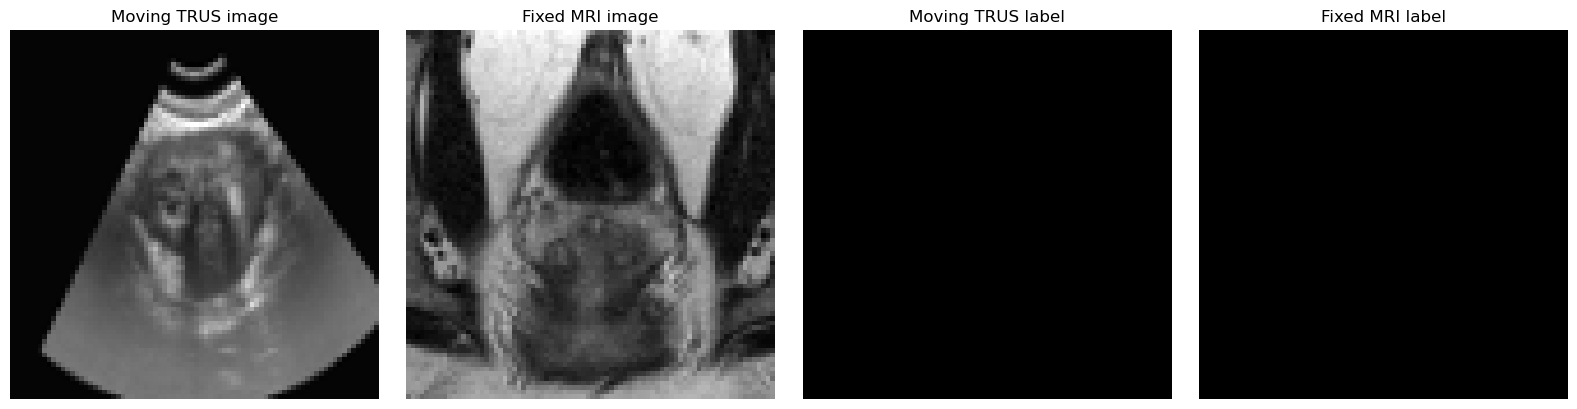

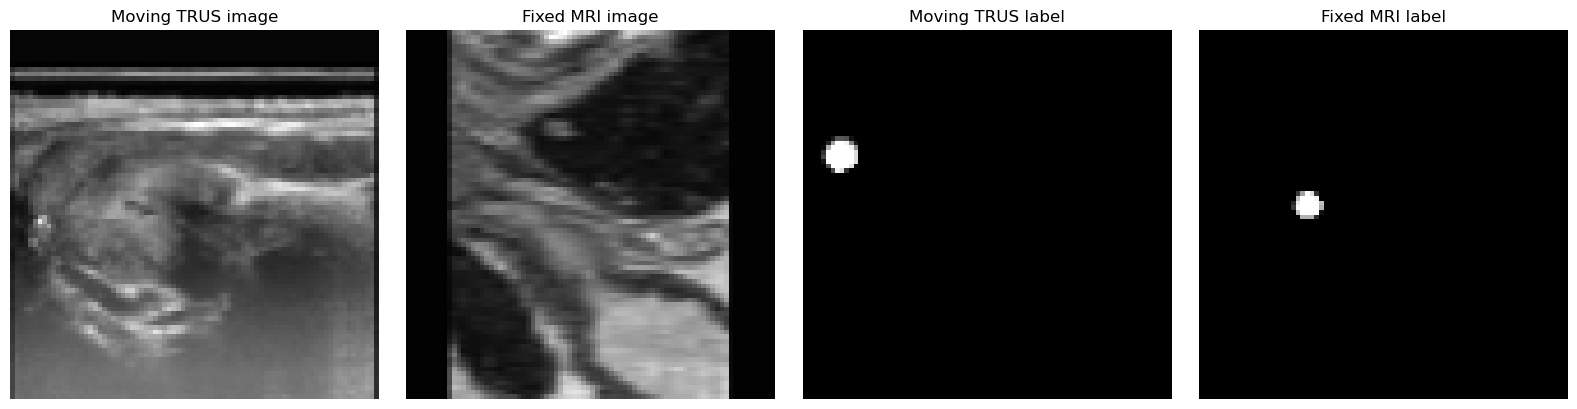

(120, 128, 128, 6)


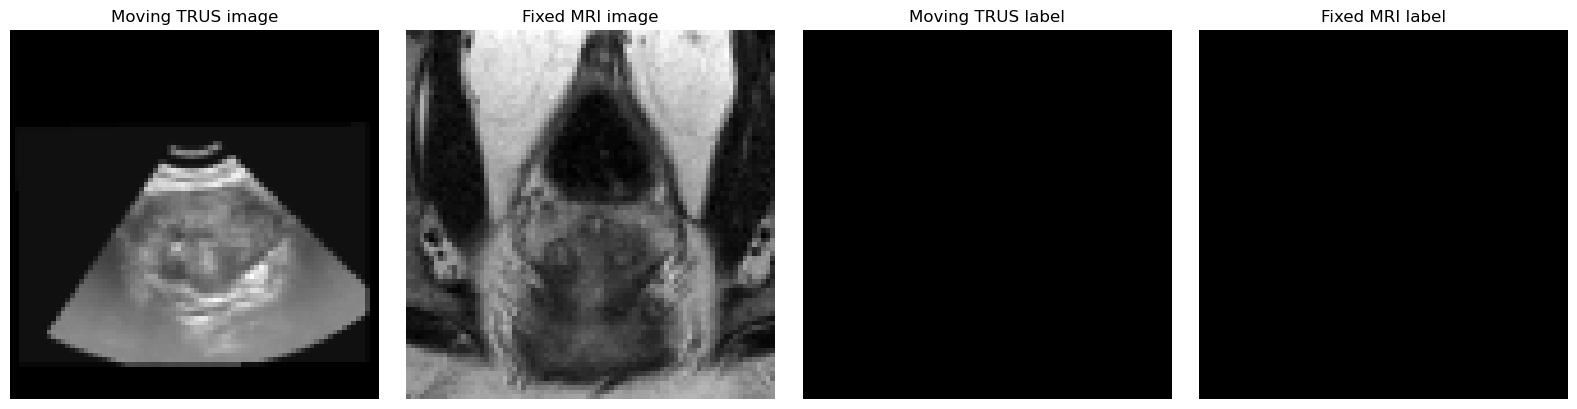

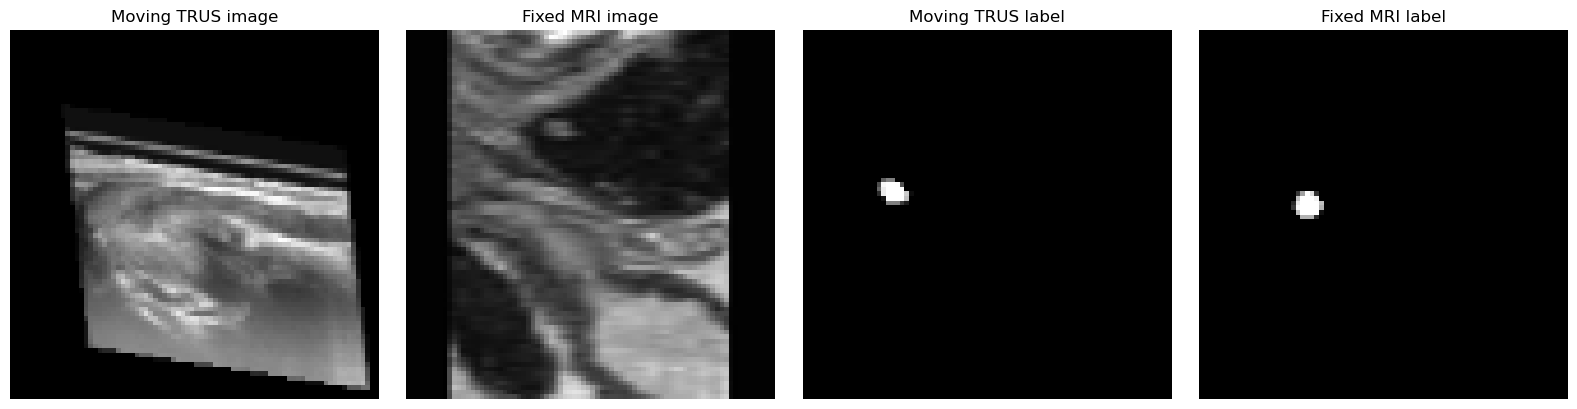

In [4]:
moving_image_shape = (80, 80, 80, 1)
fixed_image_shape = (80, 80, 80, 1)

from skimage.transform import resize
import nibabel as nib

import os
import nibabel as nib
import matplotlib.pyplot as plt

import numpy as np

def resize_3d_image(image, shape):
    resized_image = resize(image, output_shape=shape)
    if np.amax(resized_image) == np.amin(resized_image):
        normalised_image = resized_image
    else:
        normalised_image = (resized_image-np.amin(resized_image))/(np.amax(resized_image)-np.amin(resized_image))
    return normalised_image
label_to_select = 1

for f_path in ["nifti_data/val/", "nifti_data_preprocessed/val/"]:
    f_name = "case000067.nii.gz"
    moving_images_path = os.path.join(f_path, 'us_images')
    fixed_images_path = os.path.join(f_path, 'mr_images')
    moving_labels_path = os.path.join(f_path, 'us_labels')
    fixed_labels_path = os.path.join(f_path, 'mr_labels')
    
    moving_image = resize_3d_image(nib.load(os.path.join(moving_images_path, f_name)).get_fdata(), moving_image_shape)
    fixed_image = resize_3d_image(nib.load(os.path.join(fixed_images_path, f_name)).get_fdata(), moving_image_shape)
    moving_label = resize_3d_image(nib.load(os.path.join(moving_labels_path, f_name)).get_fdata()[:, :, :, label_to_select], moving_image_shape)
    fixed_label = resize_3d_image(nib.load(os.path.join(fixed_labels_path, f_name)).get_fdata()[:, :, :, label_to_select], moving_image_shape)

    print(nib.load(os.path.join(moving_labels_path, f_name)).get_fdata().shape)
    
    # slice at index 40 along the first axis
    slice_idx = 40
    mov_img_slice = np.squeeze(moving_image[slice_idx, :, :])
    fix_img_slice = np.squeeze(fixed_image[slice_idx, :, :])
    mov_lbl_slice = np.squeeze(moving_label[slice_idx, :, :])
    fix_lbl_slice = np.squeeze(fixed_label[slice_idx, :, :])
    
    # plot them side by side
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    axs[0].imshow(mov_img_slice.T, cmap='gray', origin='lower')
    axs[0].set_title("Moving TRUS image")
    axs[1].imshow(fix_img_slice.T, cmap='gray', origin='lower')
    axs[1].set_title("Fixed MRI image")
    axs[2].imshow(mov_lbl_slice.T, cmap='gray', origin='lower')
    axs[2].set_title("Moving TRUS label")
    axs[3].imshow(fix_lbl_slice.T, cmap='gray', origin='lower')
    axs[3].set_title("Fixed MRI label")
    for ax in axs: ax.axis('off')
    plt.tight_layout()
    plt.show()

    # slice at index 40 along the first axis
    slice_idx = 40
    mov_img_slice = np.squeeze(moving_image[:, slice_idx, :])
    fix_img_slice = np.squeeze(fixed_image[:, slice_idx, :])
    mov_lbl_slice = np.squeeze(moving_label[:, slice_idx, :])
    fix_lbl_slice = np.squeeze(fixed_label[:, slice_idx, :])
    
    # plot them side by side
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    axs[0].imshow(mov_img_slice.T, cmap='gray', origin='lower')
    axs[0].set_title("Moving TRUS image")
    axs[1].imshow(fix_img_slice.T, cmap='gray', origin='lower')
    axs[1].set_title("Fixed MRI image")
    axs[2].imshow(mov_lbl_slice.T, cmap='gray', origin='lower')
    axs[2].set_title("Moving TRUS label")
    axs[3].imshow(fix_lbl_slice.T, cmap='gray', origin='lower')
    axs[3].set_title("Fixed MRI label")
    for ax in axs: ax.axis('off')
    plt.tight_layout()
    plt.show()

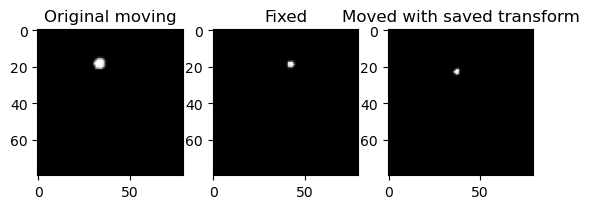

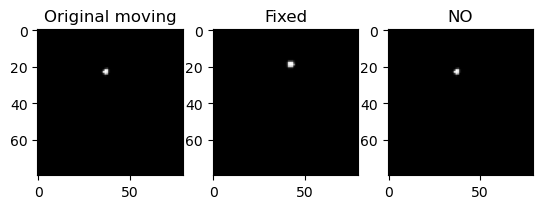

In [22]:
f_path = "nifti_data/val/"
f_name = "case000065.nii.gz"
moving_labels_path = os.path.join(f_path, 'us_labels')
fixed_labels_path = os.path.join(f_path, 'mr_labels')

# Load raw volumes (NO resizing)
moving_label_raw = nib.load(os.path.join(moving_labels_path, f_name)).get_fdata()
fixed_label_raw  = nib.load(os.path.join(fixed_labels_path, f_name)).get_fdata()

label_to_select = 1
moving_label = np.squeeze(moving_label_raw[:,:,:, label_to_select])
fixed_label  = np.squeeze(fixed_label_raw[:,:,:, label_to_select])

# Convert to ants images in ORIGINAL voxel space
mov_lbl_img = ants.from_numpy(moving_label.astype(np.float32))
fix_lbl_img = ants.from_numpy(fixed_label.astype(np.float32))

# Apply the saved transform with the fixed label as reference
moved_us_img = ants.apply_transforms(
    fixed=fix_lbl_img,
    moving=mov_lbl_img,
    transformlist=transforms[0],
    interpolator='nearestNeighbor'
)

moved_us_np = resize_3d_image(moved_us_img.numpy(), moving_image_shape)
fixed_label = resize_3d_image(fixed_label, moving_image_shape)
moving_label = resize_3d_image(moving_label, moving_image_shape)

# Visualize a slice
slice_idx = 40
plt.subplot(1,3,1)
plt.imshow(moving_label[:, slice_idx, :], cmap='gray')
plt.title("Original moving")

plt.subplot(1,3,2)
plt.imshow(fixed_label[:, slice_idx, :], cmap='gray')
plt.title("Fixed")

plt.subplot(1,3,3)
plt.imshow(moved_us_np[:, slice_idx, :], cmap='gray')
plt.title("Moved with saved transform")

plt.show()

moved_us_np = resize_3d_image(moved_us_img.numpy(), moving_image_shape)
fixed_label = resize_3d_image(fixed_label, moving_image_shape)
moving_label = resize_3d_image(moving_label, moving_image_shape)


f_path = "nifti_data_preprocessed_v2/val/"
f_name = "case000065.nii.gz"
moving_images_path = os.path.join(f_path, 'us_images')
fixed_images_path = os.path.join(f_path, 'mr_images')

moving_labels_path = os.path.join(f_path, 'us_labels')
fixed_labels_path = os.path.join(f_path, 'mr_labels')

#label_to_select = 2

moving_label = resize_3d_image(nib.load(os.path.join(moving_labels_path, f_name)).get_fdata()[:, :, :, label_to_select], moving_image_shape)
fixed_label = resize_3d_image(nib.load(os.path.join(fixed_labels_path, f_name)).get_fdata()[:, :, :, label_to_select], moving_image_shape)

slice_idx = 40
plt.subplot(1,3,1)
plt.imshow(moving_label[:, slice_idx, :], cmap='gray')
plt.title("Original moving")

plt.subplot(1,3,2)
plt.imshow(fixed_label[:, slice_idx, :], cmap='gray')
plt.title("Fixed")

plt.subplot(1,3,3)
plt.imshow(moved_us_np[:, slice_idx, :], cmap='gray')
plt.title("NO")

plt.show()


In [1]:
import os
import nibabel as nib
import numpy as np
import ants

def collapse_labels(lbl):
    """
    Collapse one-hot/multi-channel labels into a single label map.
    lbl shape: (H, W, D, C)
    returns: (H, W, D) with values 0..C
    """
    return np.argmax(lbl, axis=-1)

def preprocess_affine_registration(data_dir, output_dir):
    """
    Preprocess dataset by affinely registering US to MR using all labels.

    Args:
        data_dir (str): input directory containing 'mr_images', 'mr_labels',
                        'us_images', 'us_labels'.
        output_dir (str): output directory to save registered volumes.
    Returns:
        transforms_list: list of fwdtransforms (length = number of cases).
    """

    mr_img_dir = os.path.join(data_dir, "mr_images")
    mr_lbl_dir = os.path.join(data_dir, "mr_labels")
    us_img_dir = os.path.join(data_dir, "us_images")
    us_lbl_dir = os.path.join(data_dir, "us_labels")

    # Create output directories
    for sub in ["mr_images", "mr_labels", "us_images", "us_labels"]:
        os.makedirs(os.path.join(output_dir, sub), exist_ok=True)

    case_names = sorted(os.listdir(mr_img_dir))
    transforms_list = []

    for case in case_names:
        try:
            print(f"Processing {case}...")

            # Load NIfTI files
            mr_img_nib = nib.load(os.path.join(mr_img_dir, case))
            mr_lbl_nib = nib.load(os.path.join(mr_lbl_dir, case))
            us_img_nib = nib.load(os.path.join(us_img_dir, case))
            us_lbl_nib = nib.load(os.path.join(us_lbl_dir, case))

            mr_img = mr_img_nib.get_fdata()
            mr_lbl = mr_lbl_nib.get_fdata()  # shape: H x W x D x C
            us_img = us_img_nib.get_fdata()
            us_lbl = us_lbl_nib.get_fdata()  # shape: H x W x D x C

            # Collapse all label channels into single label maps for registration
            mr_lbl_collapse = collapse_labels(mr_lbl)
            us_lbl_collapse = collapse_labels(us_lbl)

            # Convert to ANTs images
            mr_lbl_img = ants.from_numpy(mr_lbl_collapse.astype(np.float32))
            us_lbl_img = ants.from_numpy(us_lbl_collapse.astype(np.float32))

            # Register based on all labels → affine
            reg = ants.registration(
                fixed=mr_lbl_img,
                moving=us_lbl_img,
                type_of_transform='Affine',
                interpolator='nearestNeighbor'
            )
            transforms_list.append(reg['fwdtransforms'])

            # Apply transform to US image (linear interpolator)
            us_img_ants = ants.from_numpy(us_img.astype(np.float32))
            moved_us_img = ants.apply_transforms(
                fixed=ants.from_numpy(mr_img.astype(np.float32)),
                moving=us_img_ants,
                transformlist=reg['fwdtransforms'],
                interpolator='linear'
            )

            # Apply transform to US label channels (nearest-neighbor)
            moved_channels = []
            for c in range(us_lbl.shape[-1]):
                mov_lbl_np = np.squeeze(us_lbl[..., c])
                mov_lbl_img = ants.from_numpy(mov_lbl_np.astype(np.float32))
                moved_lbl_img = ants.apply_transforms(
                    fixed=ants.from_numpy(mr_lbl[..., c].astype(np.float32)),
                    moving=mov_lbl_img,
                    transformlist=reg['fwdtransforms'],
                    interpolator='nearestNeighbor'
                )
                moved_channels.append(moved_lbl_img.numpy())
            moved_us_lbl = np.stack(moved_channels, axis=-1)

            # Save registered outputs (keep multi-channel format for labels)
            nib.save(mr_img_nib, os.path.join(output_dir, "mr_images", case))
            nib.save(mr_lbl_nib, os.path.join(output_dir, "mr_labels", case))
            nib.save(nib.Nifti1Image(moved_us_img.numpy(), mr_img_nib.affine),
                     os.path.join(output_dir, "us_images", case))
            nib.save(nib.Nifti1Image(moved_us_lbl, mr_img_nib.affine),
                     os.path.join(output_dir, "us_labels", case))

        except Exception as e:
            print(f"⚠️ Registration failed for {case}: {e}")
            # Save originals unchanged
            nib.save(mr_img_nib, os.path.join(output_dir, "mr_images", case))
            nib.save(mr_lbl_nib, os.path.join(output_dir, "mr_labels", case))
            nib.save(us_img_nib, os.path.join(output_dir, "us_images", case))
            nib.save(us_lbl_nib, os.path.join(output_dir, "us_labels", case))

    print("✅ Preprocessing complete. Registered (or original) data saved to:", output_dir)
    return transforms_list


In [4]:
data_dir = "nifti_data/train"
output_dir = "pp_data/train"
preprocess_affine_registration(data_dir, output_dir)

Processing case000000.nii.gz...
Processing case000001.nii.gz...
Processing case000002.nii.gz...
Processing case000003.nii.gz...
Processing case000004.nii.gz...
Processing case000005.nii.gz...
Processing case000006.nii.gz...
⚠️ Registration failed for case000006.nii.gz: Registration failed with error code 1
Processing case000007.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x561b23ac9f30)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x561b22fda120): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




⚠️ Registration failed for case000007.nii.gz: Registration failed with error code 1
Processing case000008.nii.gz...


Exception Object caught: 

itk::ExceptionObject (0x561b23c85fa0)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x561b22fda120): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000009.nii.gz...
Processing case000010.nii.gz...
Processing case000011.nii.gz...
Processing case000012.nii.gz...
Processing case000013.nii.gz...
Processing case000014.nii.gz...
Processing case000015.nii.gz...
Processing case000016.nii.gz...
Processing case000017.nii.gz...
Processing case000018.nii.gz...
Processing case000019.nii.gz...
Processing case000020.nii.gz...
Processing case000021.nii.gz...
Processing case000022.nii.gz...
Processing case000023.nii.gz...
Processing case000024.nii.gz...
Processing case000025.nii.gz...
Processing case000026.nii.gz...
Processing case000027.nii.gz...
Processing case000028.nii.gz...
Processing case000029.nii.gz...
Processing case000030.nii.gz...
Processing case000031.nii.gz...
Processing case000032.nii.gz...
Processing case000033.nii.gz...
Processing case000034.nii.gz...
Processing case000035.nii.gz...
Processing case000036.nii.gz...
Processing case000037.nii.gz...
Processing case000038.nii.gz...
Processing case000039.nii.gz...
Processi

Exception Object caught: 

itk::ExceptionObject (0x561b23c32fe0)
Location: "unknown" 
File: /project/itksource/Modules/Filtering/ImageStatistics/include/itkImageMomentsCalculator.hxx
Line: 123
Description: ITK ERROR: ImageMomentsCalculator(0x561b214a3810): Compute(): Total Mass of the image was zero. Aborting here to prevent division by zero later on.




Processing case000045.nii.gz...
Processing case000046.nii.gz...
Processing case000047.nii.gz...
Processing case000048.nii.gz...
Processing case000049.nii.gz...
Processing case000050.nii.gz...
Processing case000051.nii.gz...
Processing case000052.nii.gz...
Processing case000053.nii.gz...
Processing case000054.nii.gz...
Processing case000055.nii.gz...
Processing case000056.nii.gz...
Processing case000057.nii.gz...
Processing case000058.nii.gz...
Processing case000059.nii.gz...
Processing case000060.nii.gz...
Processing case000061.nii.gz...
Processing case000062.nii.gz...
Processing case000063.nii.gz...
Processing case000064.nii.gz...
✅ Preprocessing complete. Registered (or original) data saved to: pp_data/train


[['/tmp/tmplrr4cho70GenericAffine.mat'],
 ['/tmp/tmp332v77j20GenericAffine.mat'],
 ['/tmp/tmpcah_u3bz0GenericAffine.mat'],
 ['/tmp/tmp97i4fyu00GenericAffine.mat'],
 ['/tmp/tmphj51f5x70GenericAffine.mat'],
 ['/tmp/tmpnwxzatc50GenericAffine.mat'],
 ['/tmp/tmpjy6o8lqg0GenericAffine.mat'],
 ['/tmp/tmp5hvj9mac0GenericAffine.mat'],
 ['/tmp/tmp_56xwm2m0GenericAffine.mat'],
 ['/tmp/tmpluwef5my0GenericAffine.mat'],
 ['/tmp/tmpbiag9wnf0GenericAffine.mat'],
 ['/tmp/tmpfk6xwu7s0GenericAffine.mat'],
 ['/tmp/tmptks1mgew0GenericAffine.mat'],
 ['/tmp/tmpvvwguz6a0GenericAffine.mat'],
 ['/tmp/tmpxkzf7tnh0GenericAffine.mat'],
 ['/tmp/tmp8ntzi14_0GenericAffine.mat'],
 ['/tmp/tmp9rd5lv1i0GenericAffine.mat'],
 ['/tmp/tmp2_slz1fn0GenericAffine.mat'],
 ['/tmp/tmpleoxhw5d0GenericAffine.mat'],
 ['/tmp/tmpx2r_fkok0GenericAffine.mat'],
 ['/tmp/tmpvw_q9d3h0GenericAffine.mat'],
 ['/tmp/tmpcurg_x570GenericAffine.mat'],
 ['/tmp/tmp41h9w_lw0GenericAffine.mat'],
 ['/tmp/tmp7g7lt4yv0GenericAffine.mat'],
 ['/tmp/tmpkp7pz